<a href="https://colab.research.google.com/github/Gowri-Rk/Machine-Learning/blob/master/Colabs/ML_GermanCreditDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Prediction of High vs Low risk of individuals using German CreditCard Dataset**

**Business Case and Value**
In order for banks to proceed with a person, it is essential to determine the level of risk involved with that individual. This prediction depends on a variety of factors that can be analysed to make an informed decision. 
Along with this prediction, we can use the dataset to derive invaluable insight like market segmentation by identifying clusters of customers with similar credits. 

**Data Narrative**

The German CreditCard Dataset consists of 20 variables with 7 being numerical and 13 categorical.  It contains records of 1000 persons. Each person is classified as a High or Low risk individual. The following are the features found in the dataset:
 
1. Status (Categorical)
2. Duration (Numerical)
3. CreditHistory (Categorical)
4. Purpose (Categorical)
5. CreditAmount (Numerical)
6. SavingsAccount/bonds (Categorical)
7. PresentEmploymentSince (Categorical)
8. InstallmentRate (Numerical)
9. PersonalStatusAndSex (Categorical)
10. OtherDebtors/Guarantors (Categorical)
11. PresentResidenceSince (Numerical)
12. Property (Categorical)
13. Age (Numerical)
14. OtherInstallmentPlans (Categorical)
15. Housing (Categorical)
16. NumberOfExistingCredits (Numerical)
17. Job (Categorical)
18. NoOfPeopleLiable (Numerical)
19. Telephone (Categorical)
20. ForeignWorker (Categorical)
21. Classification (Numerical)

# Initial package imports, reading data files

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plot

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, roc_auc_score, auc, accuracy_score
from sklearn.model_selection import ShuffleSplit,train_test_split, cross_val_score, GridSearchCV

import seaborn 
seaborn.set_context('notebook') 
seaborn.set_style(style='darkgrid')

from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA


Mounting drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
#specify the column names
col_names = ['Status', 'Duration', 'CreditHistory', 'Purpose',
             'CreditAmount', 'SavingsAccount/bonds', 'PresentEmploymentSince', 
             'InstallmentRate', 'PersonalStatusAndSex', 'OtherDebtors/Guarantors',
             'PresentResidenceSince', 'Property', 'Age', 'OtherInstallmentPlans', 'Housing', 
             'NumberOfExistingCredits', 'Job', 'NoOfPeopleLiable', 'Telephone', 'ForeignWorker', 'Classification']

#read the data from a csv file
df_data = pd.read_csv('/content/gdrive/My Drive/MLSpring2020/datatribe-nutritionbasediseaseprediction/MidTerm/Gowri/german-data.data', ' ', names = col_names)

In [ ]:
df_data.head(10)


,Status,Duration,CreditHistory,Purpose,CreditAmount,SavingsAccount/bonds,PresentEmploymentSince,InstallmentRate,PersonalStatusAndSex,OtherDebtors/Guarantors,PresentResidenceSince,Property,Age,OtherInstallmentPlans,Housing,NumberOfExistingCredits,Job,NoOfPeopleLiable,Telephone,ForeignWorker,Classification
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,4,A124,35,A143,A153,1,A172,2,A192,A201,1
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,4,A122,53,A143,A152,1,A173,1,A191,A201,1
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,2,A123,35,A143,A151,1,A174,1,A192,A201,1
8,A14,12,A32,A43,3059,A64,A74,2,A91,A101,4,A121,61,A143,A152,1,A172,1,A191,A201,1
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,2,A123,28,A143,A152,2,A174,1,A191,A201,2


# Data Preprocessing - Cleaning, Scaling, Encoding data to make it ready for modelling

In [ ]:
#The classes are given a value 1 or 2. 1 -> Good, 2 -> Bad
#Converting the values to 0 and 1 for better representation. 1 -> Good, 0 -> Bad.

df_data.Classification.replace([1, 2], [1, 0], inplace=True)

Visualize the number of good credits (low risk) and bad credits(high risk)

In [ ]:
df_data.Classification.value_counts()

1    700
0    300
Name: Classification, dtype: int64

**Scaling numerical data with Standard Scaler - Total of 7 features**

In [ ]:
#list of numerical features

numericalVariables = ['CreditAmount', 'Duration', 'InstallmentRate', 'PresentResidenceSince', 'Age', 
           'NumberOfExistingCredits', 'NoOfPeopleLiable', 'Classification']

scaler = StandardScaler()
std_data_np = scaler.fit_transform(df_data[numericalVariables].drop(['Classification'], axis=1))
std_data = pd.DataFrame(std_data_np)

**Encoding categorical data - 13 features**


In [ ]:
from collections import defaultdict

#list of categorical features
categoricalVariables = ['Status', 'CreditHistory', 'Purpose', 'SavingsAccount/bonds', 'PresentEmploymentSince',
                        'PersonalStatusAndSex', 'OtherDebtors/Guarantors', 'Property', 'OtherInstallmentPlans', 'Housing', 'Job', 
                        'Telephone', 'ForeignWorker']

d = defaultdict(LabelEncoder)

#encoding
encoded_data_np = df_data[categoricalVariables].apply(lambda x: d[x.name].fit_transform(x))

encoded_data = pd.get_dummies(df_data[categoricalVariables])
df_data_final = pd.concat([df_data[numericalVariables], encoded_data], axis=1)

print(df_data_final.shape)

(1000, 62)


In [ ]:
df_data_final.head(10)

,CreditAmount,Duration,InstallmentRate,PresentResidenceSince,Age,NumberOfExistingCredits,NoOfPeopleLiable,Classification,Status_A11,Status_A12,Status_A13,Status_A14,CreditHistory_A30,CreditHistory_A31,CreditHistory_A32,CreditHistory_A33,CreditHistory_A34,Purpose_A40,Purpose_A41,Purpose_A410,Purpose_A42,Purpose_A43,Purpose_A44,Purpose_A45,Purpose_A46,Purpose_A48,Purpose_A49,SavingsAccount/bonds_A61,SavingsAccount/bonds_A62,SavingsAccount/bonds_A63,SavingsAccount/bonds_A64,SavingsAccount/bonds_A65,PresentEmploymentSince_A71,PresentEmploymentSince_A72,PresentEmploymentSince_A73,PresentEmploymentSince_A74,PresentEmploymentSince_A75,PersonalStatusAndSex_A91,PersonalStatusAndSex_A92,PersonalStatusAndSex_A93,PersonalStatusAndSex_A94,OtherDebtors/Guarantors_A101,OtherDebtors/Guarantors_A102,OtherDebtors/Guarantors_A103,Property_A121,Property_A122,Property_A123,Property_A124,OtherInstallmentPlans_A141,OtherInstallmentPlans_A142,OtherInstallmentPlans_A143,Housing_A151,Housing_A152,Housing_A153,Job_A171,Job_A172,Job_A173,Job_A174,Telephone_A191,Telephone_A192,ForeignWorker_A201,ForeignWorker_A202
0,1169,6,4,4,67,2,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0
1,5951,48,2,2,22,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0
2,2096,12,2,3,49,1,2,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0
3,7882,42,2,4,45,1,2,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0
4,4870,24,3,4,53,2,2,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0
5,9055,36,2,4,35,1,2,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0
6,2835,24,3,4,53,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0
7,6948,36,2,2,35,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,1,0
8,3059,12,2,4,61,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0
9,5234,30,4,2,28,2,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0


Data Enrichment - Since, the features selected are pertaining to the chosen 1000 individuals, no new data was amalagmated and the modelling was performed on the choses 20 features from German Dataset

# Exploratory Data Analysis

In [ ]:
#Check the data for missing values

df_data_final.isna().sum()

CreditAmount             0
Duration                 0
InstallmentRate          0
PresentResidenceSince    0
Age                      0
                        ..
Job_A174                 0
Telephone_A191           0
Telephone_A192           0
ForeignWorker_A201       0
ForeignWorker_A202       0
Length: 62, dtype: int64

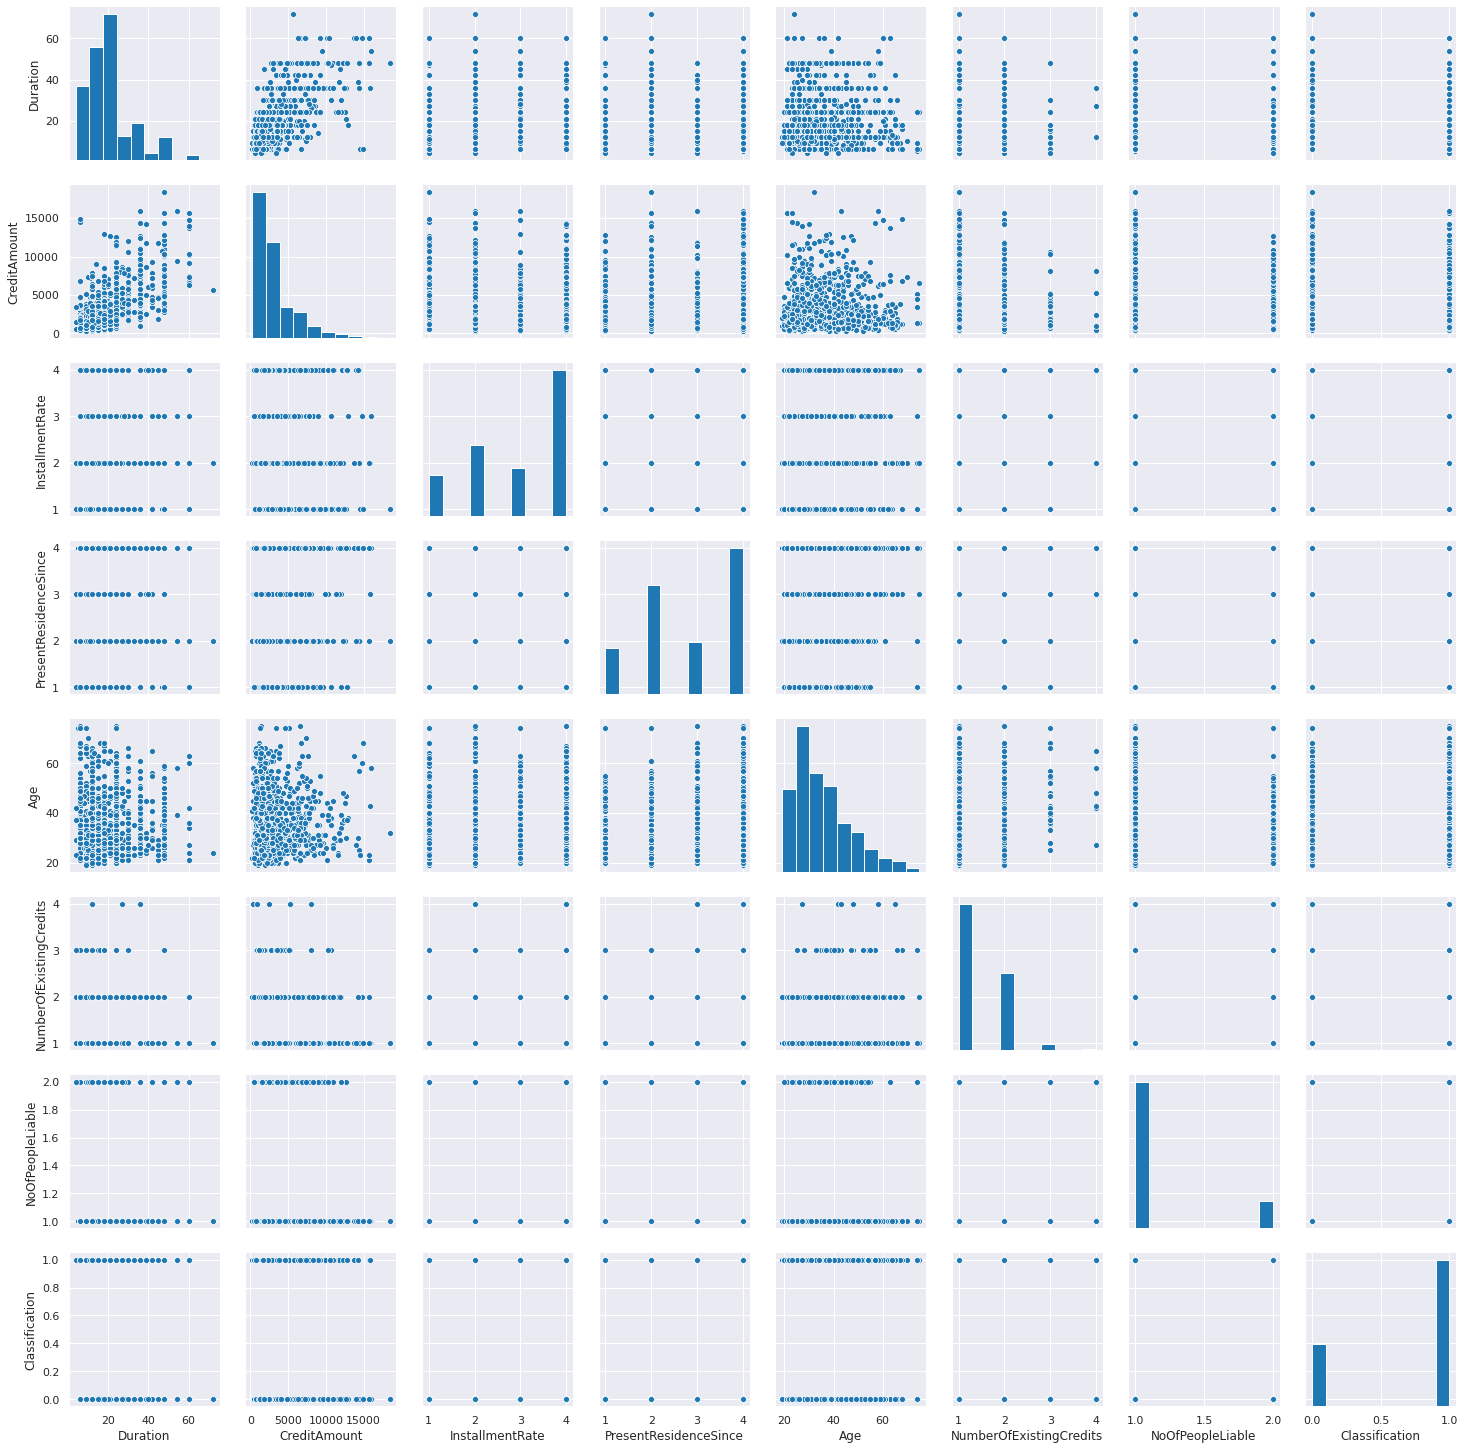

In [ ]:
#pair plots
sns.pairplot(df_data)

<Figure size 432x288 with 0 Axes>

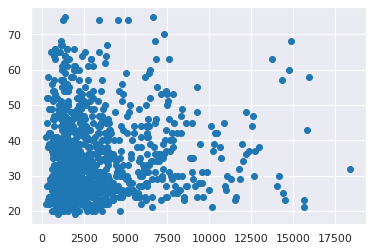

<Figure size 432x288 with 0 Axes>

In [ ]:
plot.scatter(df_data['CreditAmount'],df_data["Age"])
plot.figure()

<Figure size 432x288 with 0 Axes>

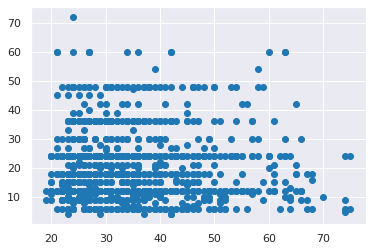

<Figure size 432x288 with 0 Axes>

In [ ]:
plot.scatter(df_data['Age'],df_data["Duration"])
plot.figure()

Text(0, 40, 'Frequency')

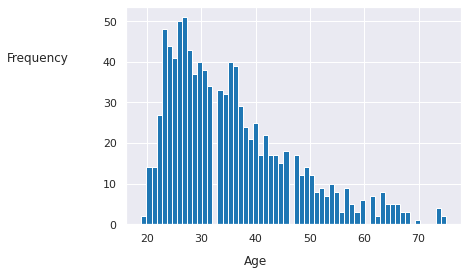

In [ ]:
fig = df_data.Age.hist(bins=60)
fig.text(40, -10, 'Age', ha='center')
fig.text(0, 40, 'Frequency', ha='center')

Text(3, -100, 'Highly Skilled')

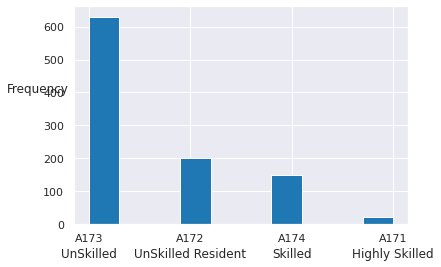

In [ ]:
fig = df_data["Job"].hist()
fig.text(-0.5, 400, 'Frequency', ha='center')
fig.text(0, -100, 'UnSkilled', ha='center')
fig.text(1, -100, 'UnSkilled Resident', ha='center')
fig.text(2, -100, 'Skilled', ha='center')
fig.text(3, -100, 'Highly Skilled', ha='center')

Text(3, -100, 'Female / Single')

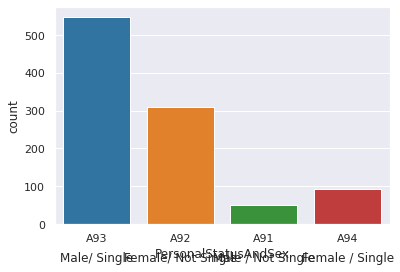

In [ ]:
fig = sns.countplot(x="PersonalStatusAndSex",data=df_data)
fig.text(0, -100, 'Male/ Single', ha='center')
fig.text(1, -100, 'Female/ Not Single', ha='center')
fig.text(2, -100, 'Male / Not Single', ha='center')
fig.text(3, -100, 'Female / Single', ha='center')
#fig.setp(fig.get_xticklabels(), rotation=45)


Text(1, -100, 'Good Credit')

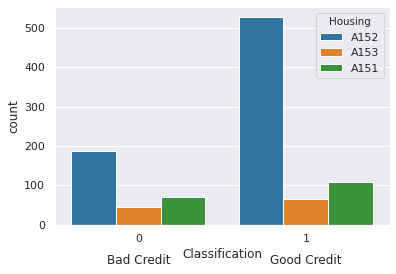

In [ ]:
#First plot
import plotly.graph_objects as go

trace0 = go.Bar(
    x = df_data[df_data["Classification"]== 1]["Housing"].value_counts().index.values,
    y = df_data[df_data["Classification"]== 1]["Housing"].value_counts().values,
    name='Good credit'
)

#Second plot
trace1 = go.Bar(
    x = df_data[df_data["Classification"]== 0]["Housing"].value_counts().index.values,
    y = df_data[df_data["Classification"]== 0]["Housing"].value_counts().values,
    name="Bad Credit"
)

data = [trace0, trace1]


fig = sns.countplot(x="Classification",hue = "Housing",data=df_data)
fig.text(0, -100, "Bad Credit", ha="center")
fig.text(1, -100, "Good Credit", ha="center")


In [ ]:
def scatters(data, h=None, pal=None):
    fig, (ax1, ax2, ax3) = plot.subplots(3,1, figsize=(8,8))
    sns.scatterplot(x="CreditAmount",y="Duration", hue=h, palette=pal, data=data, ax=ax1)
    sns.scatterplot(x="Age",y="CreditAmount", hue=h, palette=pal, data=data, ax=ax2)
    sns.scatterplot(x="Age",y="Duration", hue=h, palette=pal, data=data, ax=ax3)
    plot.tight_layout()

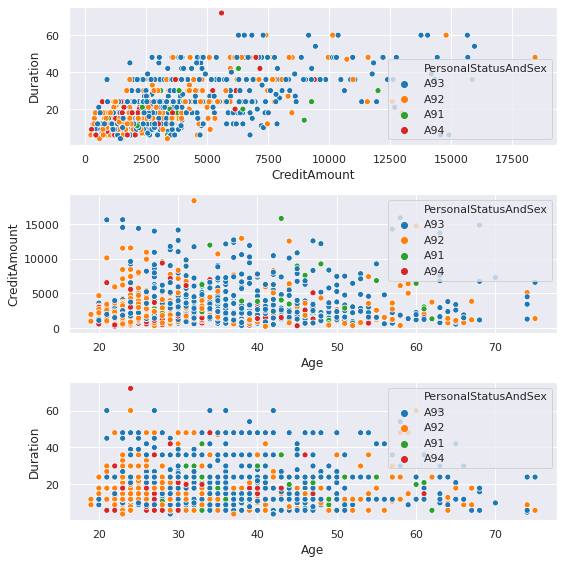

In [ ]:
scatters(df_data, h="PersonalStatusAndSex")

# Base line Modelling - K - means Clustering for Market Segregation 

In [ ]:
#K-Means clustering
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Selecting columns for clusterisation with k-means
sub_data = ["Age","CreditAmount", "Duration"]
cluster_data = df_data_final.loc[:,sub_data]

In [ ]:
def distributions(df):
    fig, (ax1, ax2, ax3) = plot.subplots(3,1, figsize=(8,8))
    sns.distplot(df["Age"], ax=ax1)
    sns.distplot(df["CreditAmount"], ax=ax2)
    sns.distplot(df["Duration"], ax=ax3)
    plot.tight_layout()

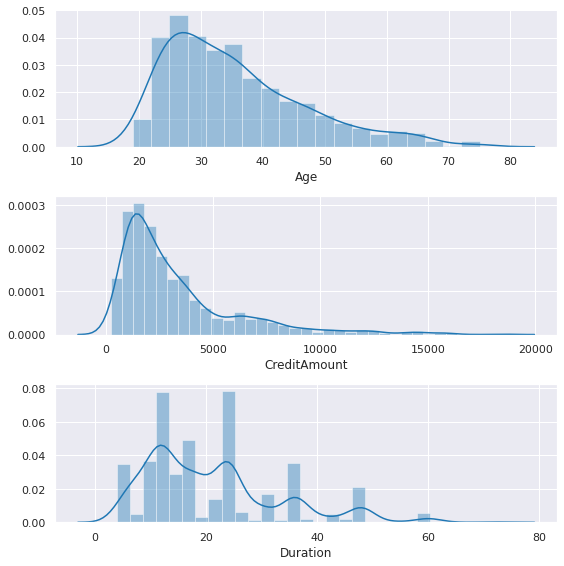

In [ ]:
distributions(cluster_data)

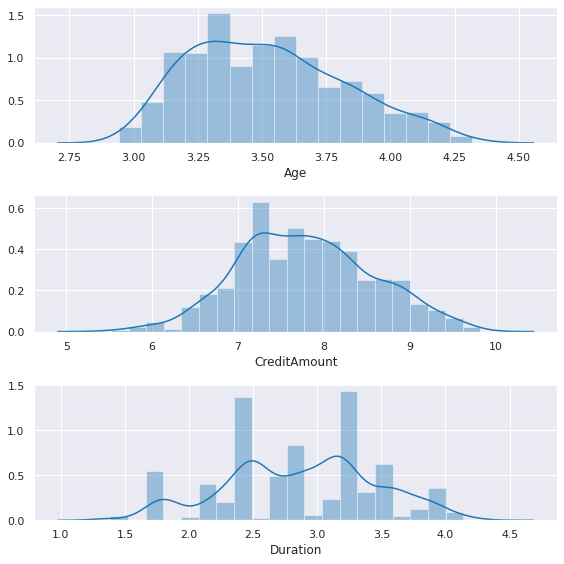

In [ ]:
cluster_log = np.log(cluster_data)
distributions(cluster_log)

In [ ]:
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_log)

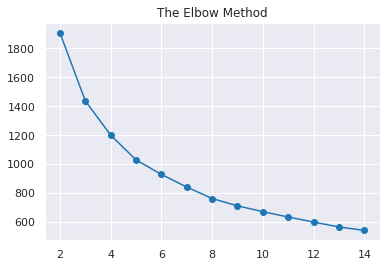

In [ ]:
clusters_range = [2,3,4,5,6,7,8,9,10,11,12,13,14]
inertias =[]

for c in clusters_range:
    kmeans = KMeans(n_clusters=c, random_state=0).fit(cluster_scaled)
    inertias.append(kmeans.inertia_)

plot.figure()
plot.title('The Elbow Method')
plot.plot(clusters_range,inertias, marker='o')

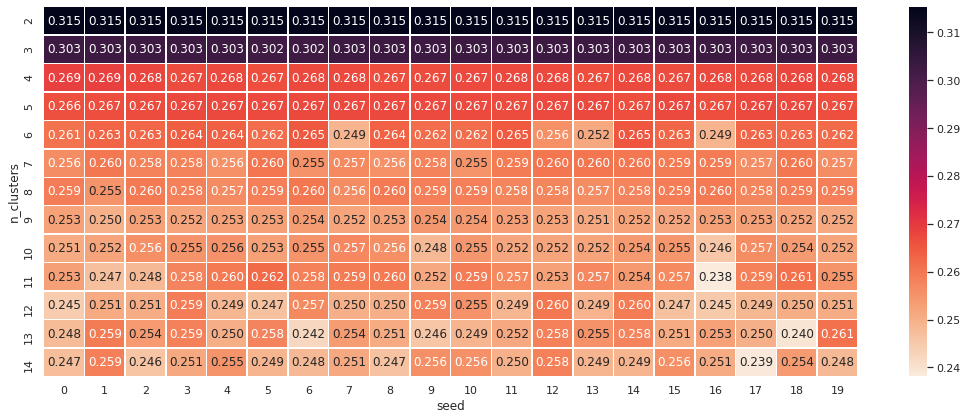

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

clusters_range = range(2,15)
random_range = range(0,20)
results =[]
for c in clusters_range:
    for r in random_range:
        clusterer = KMeans(n_clusters=c, random_state=r)
        cluster_labels = clusterer.fit_predict(cluster_scaled)
        silhouette_avg = silhouette_score(cluster_scaled, cluster_labels)
        results.append([c,r,silhouette_avg])

result = pd.DataFrame(results, columns=["n_clusters","seed","silhouette_score"])
pivot_km = pd.pivot_table(result, index="n_clusters", columns="seed",values="silhouette_score")

plot.figure(figsize=(15,6))
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plot.tight_layout()


In [ ]:
kmeans_sel = KMeans(n_clusters=3, random_state=1).fit(cluster_scaled)
labels = pd.DataFrame(kmeans_sel.labels_)
clustered_data = cluster_data.assign(Cluster=labels)

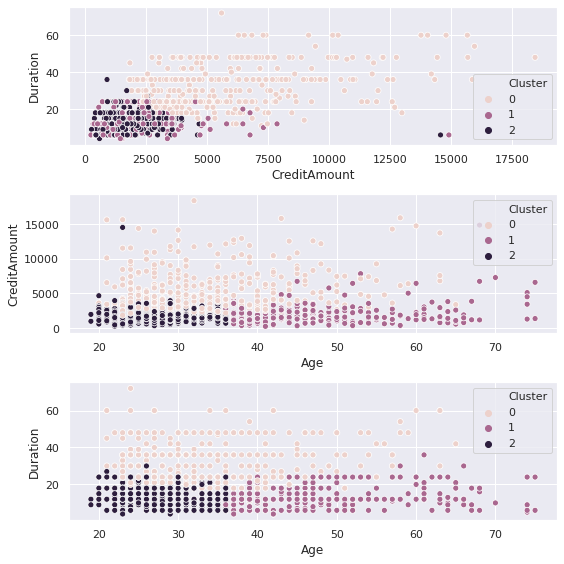

In [ ]:
scatters(clustered_data, 'Cluster')

In [ ]:
grouped_af = clustered_data.groupby(['Cluster']).mean().round(1)
grouped_af

,Age,CreditAmount,Duration
Cluster,,,
0,34.0,5665.4,32.2
1,48.7,1979.7,13.9
2,27.8,1732.2,14.2


Cluster 0 – high mean of credit amount, long duration, younger customers

Cluster 1 – low mean of credit amount, short duration, younger customers

Cluster 2 - low mean of credit amount, short duration, older customers

Cluster 3 - high mean of credit amount, middle-time duration, older customers

# Running various algorithms on CreditCard Dataset - GMM, LogReg, LinReg, XGBoost, Ran Forest, SVM, KNN, PCA, NaiveBayes

Applying Principal Component Analysis to reduce dimensions of the dataset

In [ ]:
pca = PCA(n_components=2)

In [ ]:
X = df_data_final.drop('Classification', axis=1)
y = df_data_final['Classification']

newX = pca.fit_transform(X)


Latent Manifolds - 
1. Peronsal Status is dependent on multiple latent features like Sex, SocioEconomic standing, Marital Status, Income. The feature can be represented by using these latent manifolds.

2. Credit History - This feature is dependent of certain fine grained variables like student, professional, loans etc

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [ ]:
# Function to get roc curve
def get_roc (y_test,y_pred):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    #Plot of a ROC curve
    plot.figure()
    lw = 2
    plot.plot(fpr, tpr, color='darkorange',
             label='ROC curve (area = %0.2f)' % roc_auc)
    plot.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plot.xlim([0.0, 1.0])
    plot.ylim([0.0, 1.0])
    plot.xlabel('False Positive Rate')
    plot.ylabel('True Positive Rate')
    plot.title('Receiver operating characteristic')
    plot.legend(loc="upper left")
    plot.show()
    return

## PCA

In [ ]:
pca = PCA(n_components=16)

In [ ]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=16, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
print(pca.explained_variance_ratio_)

[9.99970865e-01 1.70865046e-05 1.08572000e-05 1.53904738e-07
 1.38855833e-07 7.89966988e-08 6.20186457e-08 5.47778843e-08
 5.14520340e-08 4.54292370e-08 4.32007145e-08 4.06973121e-08
 3.84560730e-08 3.66433890e-08 3.54104043e-08 3.32386570e-08]


In [ ]:
print(pca.singular_values_)

[7.82822660e+04 3.23590922e+02 2.57945903e+02 3.07111238e+01
 2.91710310e+01 2.20026093e+01 1.94953418e+01 1.83219774e+01
 1.77570570e+01 1.66854313e+01 1.62710350e+01 1.57925616e+01
 1.53515482e+01 1.49853721e+01 1.47310993e+01 1.42722173e+01]


Analysis: On modelling different algorithms with features generated from PCA, the accuracies decreased. Hence, each model was run without PCA generated features

## Clustering

## GMM

In [ ]:
gmm = GaussianMixture(n_components = 3)

In [ ]:
gmm.fit(cluster_data)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [ ]:
# Assign a label to each sample 
labels = gmm.predict(cluster_data) 
cluster_data['labels']= labels 
d0 = cluster_data[cluster_data['labels']== 0] 
d1 = cluster_data[cluster_data['labels']== 1] 
d2 = cluster_data[cluster_data['labels']== 2]  

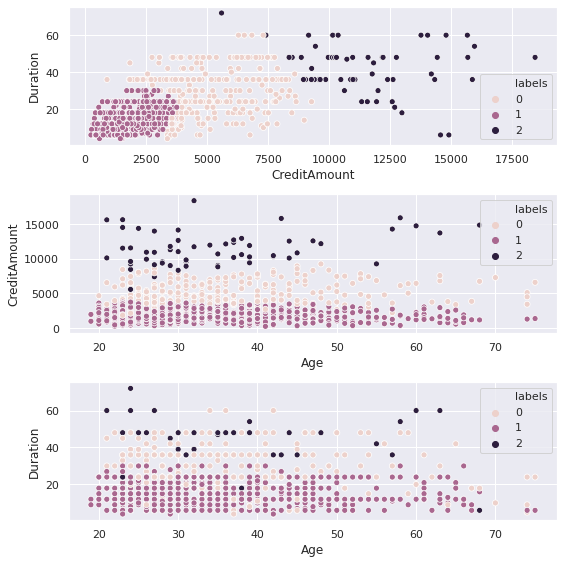

In [ ]:
scatters(cluster_data, 'labels')

In [ ]:
grouped_af = cluster_data.groupby(['labels']).mean().round(1)
grouped_af

,Age,CreditAmount,Duration
labels,,,
0,36.7,5090.8,29.7
1,35.1,1772.9,15.3
2,34.8,11423.1,41.9


Cluster 1 – Low mean of credit amount, shorter duration, younger customers

Cluster 0 – Medium mean of credit amount, medium duration, younger customers

Cluster 2 - High mean of credit amount, Long duration, younger customers

## Decision Trees

In [ ]:
dec_tree = DecisionTreeClassifier(min_samples_split=10,min_samples_leaf=5).fit(X_train, y_train)

In [ ]:
print(dec_tree,'\n')


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') 



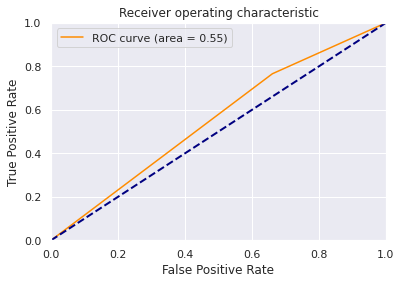

In [ ]:
y4_pred = dec_tree.predict(X_test)
get_roc(y_test,y4_pred)

In [ ]:
#Accuracy
print("Accuracy:", accuracy_score(y_test, y4_pred))

Accuracy: 0.64


In [ ]:
print("Confusion Matrix")
print(confusion_matrix(y_test, y4_pred))

Confusion Matrix
[[ 20  39]
 [ 33 108]]


In [ ]:
from sklearn import tree
dot_data = tree.export_graphviz(dec_tree, out_file=None, 
                                filled=True, rounded=True,feature_names=X.columns,class_names=['0','1'] ,
                                special_characters=True)  

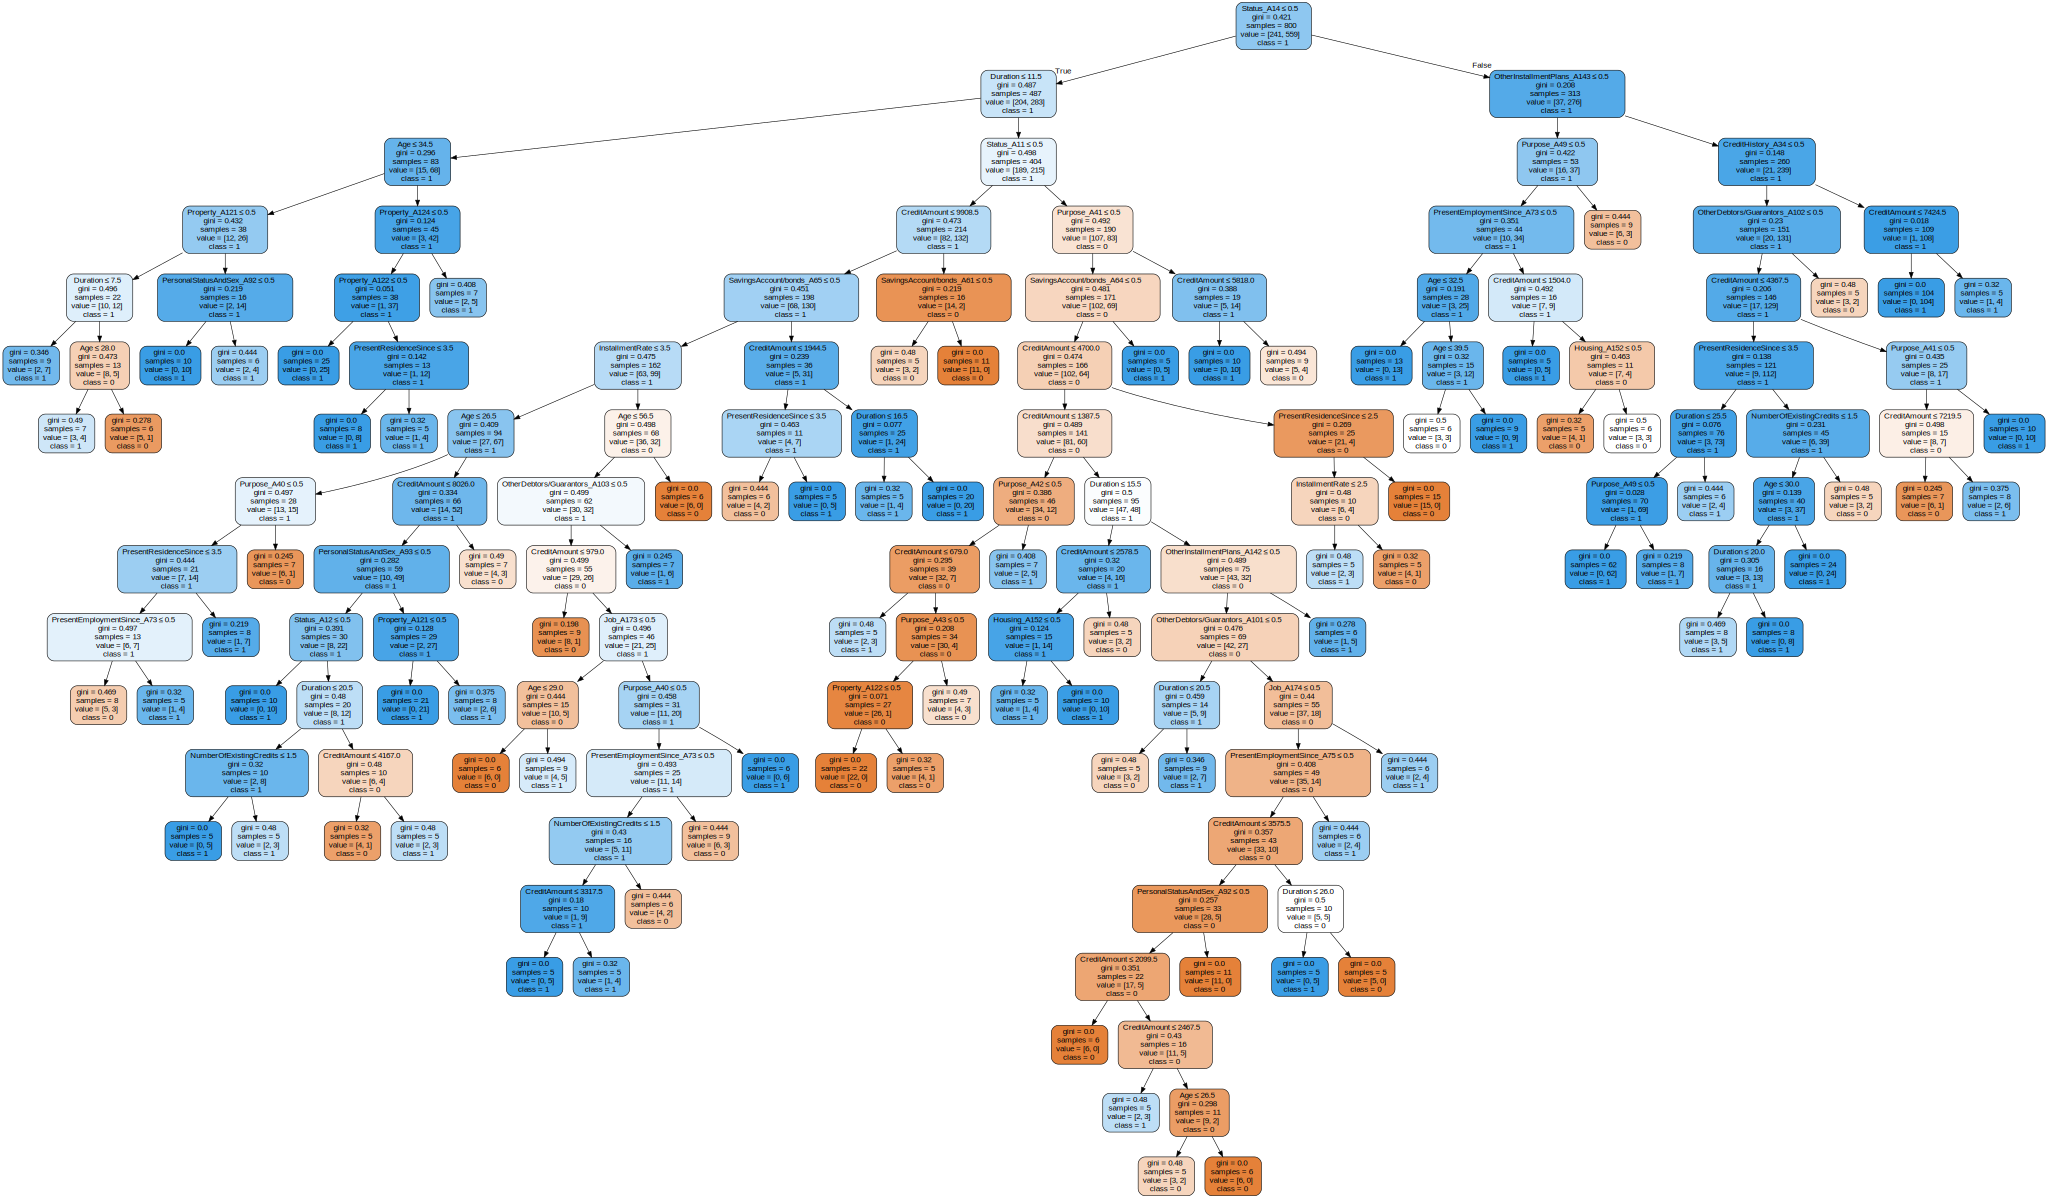

In [ ]:
import graphviz
graph=graphviz.Source(dot_data)
from IPython.display import SVG
from IPython.display import display

display(SVG(graph.pipe(format='svg')))

Analysis of Decision Trees:
The algorithm was able to classify people as Low/ High Risk with a n accuracy of 0.6 and Area Under Curve of 0.53. It is not very good at classification and results can be improved

## Random Forest

In [ ]:
randomforest = RandomForestClassifier().fit(X_train, y_train)

In [ ]:
y5_pred = randomforest.predict(X_test)

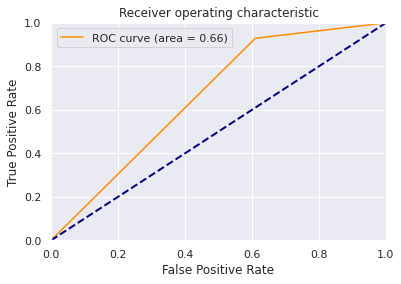

In [ ]:
get_roc(y_test,y5_pred)

In [ ]:
print(mean_squared_error(y_test, y5_pred))

0.23


In [ ]:
print(accuracy_score(y_test, y5_pred))

0.77


In [ ]:
print("Confusion Matrix")
print(confusion_matrix(y_test, y5_pred))

Confusion Matrix
[[ 23  36]
 [ 10 131]]


Analysis of Random Forests: The model classfies with an accuracy of 0.75. It performs much better than decision trees

## Classification

## Naive Bayes

In [ ]:
gnb = GaussianNB()

In [ ]:
 gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y8_pred = gnb.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y8_pred))

Accuracy: 0.72


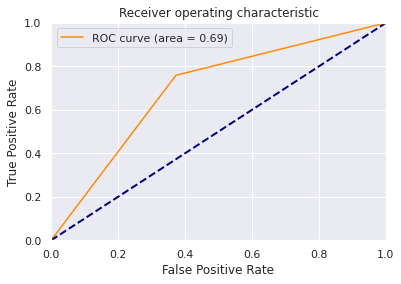

In [ ]:
get_roc(y_test,y8_pred)

In [ ]:
print("Confusion Matrix")
print(confusion_matrix(y_test, y8_pred))

Confusion Matrix
[[ 37  22]
 [ 34 107]]


Analysis of Naive Bayes: It provides a good accuracy of 0.72 and performs resonably well in classifying.

## XGBoost

In [ ]:
xgmodel = XGBClassifier()
xgmodel.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y6_pred = model.predict(X_test)

ValueError: ignored

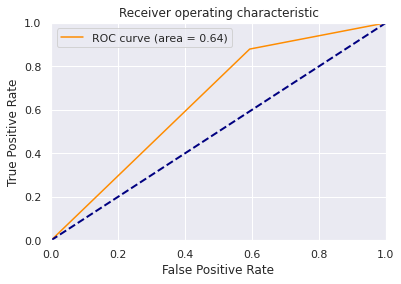

In [ ]:
get_roc (y_test,y6_pred)

In [ ]:
print("accuracy= ", accuracy_score(y_test,y6_pred))

accuracy=  0.74


In [ ]:
print("Confusion Matrix")
print(confusion_matrix(y_test, y6_pred))

Confusion Matrix
[[ 24  35]
 [ 17 124]]


Analysis of XGBoost: with an accuracy of 0.74, XGBoost is a much improvement than decision Trees and Random Forests in classifying for the given dataset

## SVM

In [ ]:
svm = SVC(gamma='auto')

In [ ]:
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y7_pred = svm.predict(X_test)

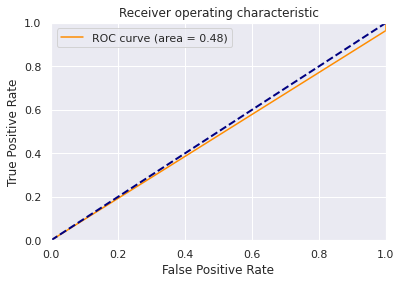

In [ ]:
get_roc(y_test,y7_pred)

In [ ]:
print("accuracy= ", accuracy_score(y_test,y7_pred))

accuracy=  0.68


In [ ]:
print("Confusion Matrix")
print(confusion_matrix(y_test, y7_pred))

Confusion Matrix
[[  0  59]
 [  5 136]]


Analysis of SVM: SVM performs poorly when compared to other classification algorithms as it only classifies with an accuracy of 0.6. Since, the data is not linearly distributed, SVM is not a good predictor

## K Nearest Neighbour

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y9_pred = knn.predict(X_test)

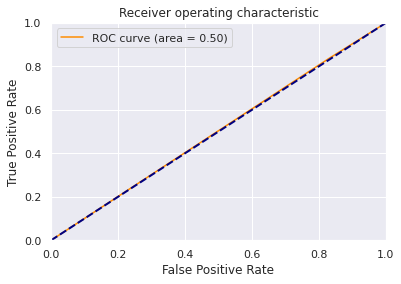

In [ ]:
get_roc(y_test,y9_pred)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y9_pred))

Accuracy: 0.64


In [ ]:
print("Confusion Matrix")
print(confusion_matrix(y_test, y9_pred))

Confusion Matrix
[[ 10  49]
 [ 23 118]]


Analysis of K-NN: K-NN did not yeild a good accuracy for various values of 'k' like 3,5, 15 etc. 

## Regression

## Linear Regression

In [ ]:
# Create linear regression object
regr1 = linear_model.LinearRegression()

In [ ]:
# Train the model using the training sets
regr1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Make predictions using the testing set
Y1_pred = regr1.predict(X_test)

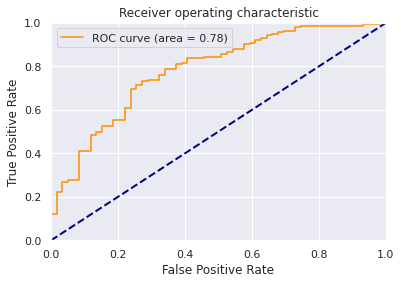

In [ ]:
get_roc (y_test,Y1_pred)

In [ ]:
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, Y1_pred))

Mean squared error: 0.17


Linear Regression analysis - Although the problem was that of a binary classification of 0/ 1, linear regression could predict with decent evaluation. 

## Logistic Regression

In [ ]:
model = LogisticRegression().fit(X_train, y_train)

In [ ]:
print(model,'\n')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 



In [ ]:
y_pred = model.predict_proba(X_test)[:,1]


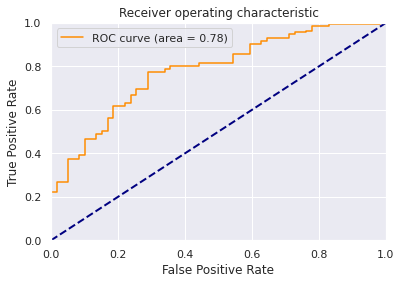

In [ ]:
get_roc (y_test,y_pred)

Logistic Regression with a area under curve of 0.78

---



# Results - Evaluation metrics, table of algorithms for analysis

Below are the evaluation metrics of all the algorithms performed on the dataset:

In [ ]:

print("Metrics of Decision Trees")
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y4_pred))
print('Accuracy: %.2f'
      % accuracy_score(y_test, y4_pred))
print('Precision: %.2f'
      % precision_score(y_test, y4_pred))
print('F1 Score: %.2f'
      % f1_score(y_test, y4_pred))
# print('Confusion Matrix: %.2f'
#       % confusion_matrix(y_test, y4_pred))

print('\n')
print('\n')

print("Metrics of Random Forests")
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y5_pred))
print('Accuracy: %.2f'
      % accuracy_score(y_test, y5_pred))
print('Precision: %.2f'
      % precision_score(y_test, y5_pred))
print('F1 Score: %.2f'
      % f1_score(y_test, y5_pred))
# print('Confusion Matrix: %.2f'
#       % confusion_matrix(y_test, y5_pred))
print('\n')
print('\n')


print("Metrics of SVM")
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y7_pred))
print('Accuracy: %.2f'
      % accuracy_score(y_test, y7_pred))
print('Precision: %.2f'
      % precision_score(y_test, y7_pred))
print('F1 Score: %.2f'
      % f1_score(y_test, y7_pred))
# print('Confusion Matrix: %.2f'
#       % confusion_matrix(y_test, y7_pred))

print('\n')
print('\n')

print("Metrics of XGBoost")
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y6_pred))
print('Accuracy: %.2f'
      % accuracy_score(y_test, y6_pred))
print('Precision: %.2f'
      % precision_score(y_test, y6_pred))
print('F1 Score: %.2f'
      % f1_score(y_test, y6_pred))
# print('Confusion Matrix: %.2f'
#       % confusion_matrix(y_test, y6_pred))
print('\n')
print('\n')


print("Metrics of K-NN")
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y9_pred))
print('Accuracy: %.2f'
      % accuracy_score(y_test, y9_pred))
print('Precision: %.2f'
      % precision_score(y_test, y9_pred))
print('F1 Score: %.2f'
      % f1_score(y_test, y9_pred))
# print('Confusion Matrix: %.2f'
#       % confusion_matrix(y_test, y9_pred))
print('\n')
print('\n')

print("Metrics of Naive Bayes")
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y8_pred))
print('Accuracy: %.2f'
      % accuracy_score(y_test, y8_pred))
print('Precision: %.2f'
      % precision_score(y_test, y8_pred))
print('F1 Score: %.2f'
      % f1_score(y_test, y8_pred))
# print('Confusion Matrix: %.2f'
#       % confusion_matrix(y_test, y8_pred))

Metrics of Decision Trees
Mean squared error: 0.36
Accuracy: 0.64
Precision: 0.73
F1 Score: 0.75




Metrics of Random Forests
Mean squared error: 0.23
Accuracy: 0.77
Precision: 0.78
F1 Score: 0.85




Metrics of SVM
Mean squared error: 0.32
Accuracy: 0.68
Precision: 0.70
F1 Score: 0.81




Metrics of XGBoost
Mean squared error: 0.26
Accuracy: 0.74
Precision: 0.78
F1 Score: 0.83




Metrics of K-NN
Mean squared error: 0.36
Accuracy: 0.64
Precision: 0.71
F1 Score: 0.77




Metrics of Naive Bayes
Mean squared error: 0.28
Accuracy: 0.72
Precision: 0.83
F1 Score: 0.79


# Conclusion

Prediction of risk in credict of individuals was perfomed on the dataset. The dataset was cleaned, preprocessed, scaled and normalized to make it suitable for modelling. Hidden latent variables were identified
The dataset was modelled through various stages of **Clustering, Classification and Regression**. The accuracies and other metrics of all the algorithms was analysed and benchmarked. The result was an efficient way of predicting wether there was a High or Low risk in a person based on various features. 

# References



1.   http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/ 
2.   https://www.kaggle.com/paulinan/bank-customer-segmentation  
3.   https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics 


